# 1. Preparation for data

- Adopted from : https://www.kaggle.com/c/titanic

### import module and data

In [1]:
#normal import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# visualization import
import seaborn as sb

# Disregard warning
import warnings 
warnings.filterwarnings('ignore')

import data from csv (both test and train dataset)

In [2]:
test = pd.read_csv("dataset/test.csv")
train = pd.read_csv("dataset/train.csv")

# 2. Data detail

## 1. Data Dictionary
1. Survival : survival or not (0 : No, 1 : Yes)  
2. pclass : Ticket class  
3. sex : sex  
4. Age : age in years  
5. sibsp : # of sibilings / spouses aborad the titanic  
6. parch : # of parents / children aborad the titanic  
7. ticket : Ticket number  
8. fare : Passenger fare  
9. cabin : Cabin number  
10. embarked : Port of Embarkation (C : Cherborug, Q : Queenstown, S : Southampton)  

## 2. Train data

In [3]:
print(train.shape)

(891, 12)


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In the train dataset, there are 891 data with 12 entries entered. With 891 data, there are 177 null data in Age entry, 687 null data in Cabin entry and 2 null data in Embarked entry.

## 3. Test data

In [8]:
print(test.shape)

(418, 11)


In [9]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

For test dataset, there are 418 data with 11 entries entered (Differ from train set, 'Survived' entry has been omitted). With 418 data entered, there are 86 data are null in Age entry and 1 data is null in Fare and 327 data are null in Cabin entry.

## 4. More detail info for classification

In [13]:
# For convinence, copy the data from original
train_survived = train[train['Survived'] == 1]
train_not_survived = train[train['Survived'] == 0]

In [14]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

0 : Did not survived / 1 : survived  
Among 891 data entered in train set, 342 people had been survived and 549 people were not.

In [15]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Among 891 data entered, 577 people were male and 314 people were female

In [16]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Among 891 data entered, for 'Age' entry, 177 data are missing (NaN) and 687 data are missing for 'Cabin' entry and 2 data are missing in 'Embarked'

# 3. Data Analyzation

## Detail data analyze according to 'Survived'

In [17]:
train_survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [18]:
train_not_survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


## Survived or not by age

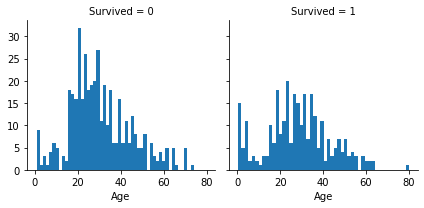

In [19]:
age_survived = sb.FacetGrid(train, col = 'Survived')
age_survived.map(plt.hist, 'Age', bins = 50)

## Survived or not by Fare

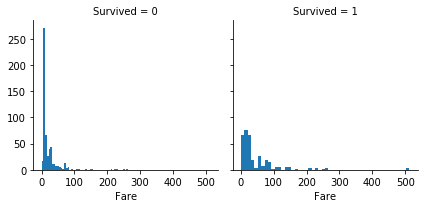

In [20]:
fare_survived = sb.FacetGrid(train, col = 'Survived')
fare_survived.map(plt.hist, 'Fare', bins = 50)

## Survived or not by sex

In [21]:
train_survived['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [22]:
train_not_survived['Sex'].value_counts()

male      468
female     81
Name: Sex, dtype: int64

Among the group who survived, 233 people were female and 109 people are male.  
Among the group who were not survived 81 people were female and 468 people are male.  
Therefore, 74% women among women population survived, 26% in total population.   
18 % men among men population survived, 12% in total population

## Survived or not by SibSp

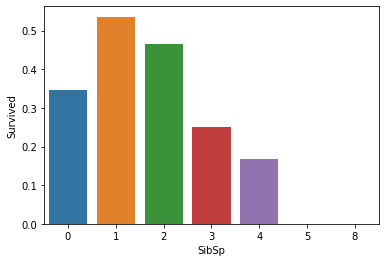

In [23]:
sb.barplot(x = 'SibSp', y = 'Survived', ci = None, data = train)

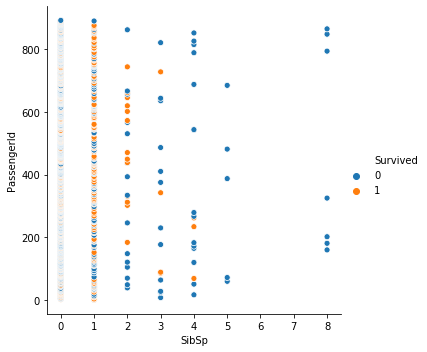

In [24]:
sb.relplot(x = 'SibSp', y = 'PassengerId', hue = 'Survived', data = train)

## Survived or not by Parch

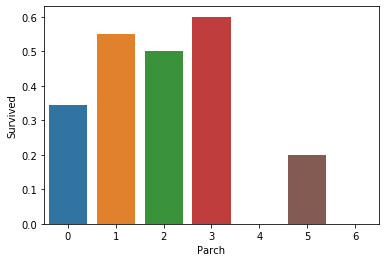

In [25]:
sb.barplot(x = 'Parch', y = 'Survived', ci = None, data = train)

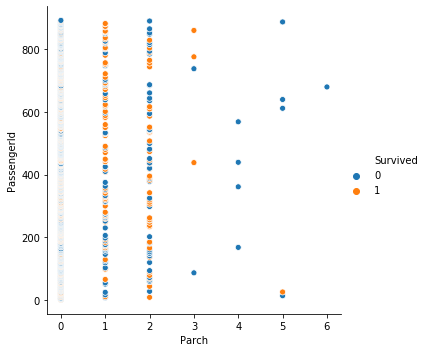

In [26]:
sb.relplot(x = 'Parch', y = 'PassengerId', hue = 'Survived', data = train)

## Survived or not by Pclass

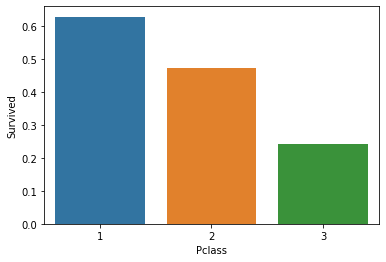

In [27]:
sb.barplot(x = 'Pclass', y = 'Survived', ci = None, data = train)

Since Survived = 1 is people who survived and Survived = 0 is people who did not survive, higher mean of survived means people survived more. Therefore according to bar graph above, people who are in pclass = 1 do survive more and then pclass = 2 the next. Pclass = 3 do have least number of people who survived.

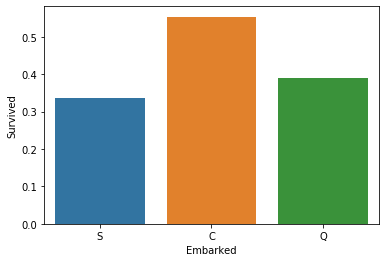

In [28]:
sb.barplot(x = 'Embarked', y = 'Survived', ci = None, data = train)

With entry of Embarked, similar with Pclass, higher survived rate means higher number of people who survived. According to the bar graph, C class does have highest and Q and S do have similar rate of people who survived.

# 4. Classify with classifiers

## Setup for classification

import module for classification

In [29]:
# Classification module
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

delete unnecessary entries

In [30]:
drop_features = ['Name', 'Ticket', 'Cabin', 'PassengerId']
train_fixed = train.drop(drop_features, axis = 1)
test_fixed = test.drop(drop_features, axis = 1)

Since mean of age does not have big difference between 'Survived' and 'not Survived', replace Null age entry with the mean of the age.

In [31]:
train_fixed['Age'].fillna(train['Age'].mean(), inplace = True)
test_fixed['Age'].fillna(train['Age'].mean(), inplace = True)

Edit Age entry with numerical value (male = 0 / female = 1)

In [32]:
train_fixed['Sex'] = train_fixed['Sex'].map({'male' : 0, 'female' : 1}).astype(int)
test_fixed['Sex'] = test_fixed['Sex'].map({'male' : 0, 'female' : 1}).astype(int)

In [33]:
test_fixed['Fare'].fillna(train['Fare'].mean(), inplace = True)

Since most of the Embarked entry is focused on 'S', therefore for null value for Embarked in trainset, replace with 'S'

In [34]:
train_fixed['Embarked'].fillna('S', inplace = True)

Edit Embarked entry with numerical value (S = 0 / C = 1 / Q = 2)

In [35]:
train_fixed['Embarked'] = train_fixed['Embarked'].map({'S' : 0, 'C' : 1, 'Q': 2}).astype(int)
test_fixed['Embarked'] = test_fixed['Embarked'].map({'S' : 0, 'C' : 1, 'Q': 2}).astype(int)

Edit SibSp entry as 0 ~ 3 : 0 and 4 ~ 8 : 1

In [36]:
train_fixed['SibSp'] = train_fixed['SibSp'].map({0 : 0, 1 : 0, 2 : 0, 3 : 0, 4 : 1, 5 : 1, 6 : 1, 7 : 1, 8 : 1}).astype(int)

Edit Parch entry as 1,2,3 as 1 and others to 0

In [37]:
train_fixed['Parch'] = train_fixed['Parch'].map({1 : 1, 2: 1, 3 : 1, 0 : 0, 4 : 0, 5 : 0, 6 : 0}).astype(int)

# 5. Classification

In [38]:
X_train = train_fixed.drop('Survived', axis = 1)
Y_train = train_fixed['Survived']
X_test = test_fixed
X_test = X_test.dropna()

## 1. Try different classification methods

### 1. Logistic Regression

In [39]:
logis_classify = LogisticRegression()
logis_classify.fit(X_train, Y_train)
Y_prediction = logis_classify.predict(X_test)
logis_score = logis_classify.score(X_train, Y_train)
print("The score of Logistic Regression is : " + str(logis_score))

The score of Logistic Regression is : 0.7968574635241302


### 2. Support Vector Machine (SVM)

In [40]:
svm_classify = SVC()
svm_classify.fit(X_train, Y_train)
Y_prediction_svm = svm_classify.predict(X_test)
svm_score = svm_classify.score(X_train, Y_train)
print("The score of SVM is : " + str(svm_score))

The score of SVM is : 0.8765432098765432


### 3. k-Nearest Neighbor(KNN)

In [41]:
knn_classify = KNeighborsClassifier(n_neighbors = 2)
knn_classify.fit(X_train, Y_train)
Y_prediction_knn = knn_classify.predict(X_test)
knn_score = knn_classify.score(X_train, Y_train)
print("The score of KNN is : " + str(knn_score))

The score of KNN is : 0.8372615039281706


### 4. Decision tree

In [42]:
tree_classify = DecisionTreeClassifier()
tree_classify.fit(X_train, Y_train)
Y_prediction_tree = tree_classify.predict(X_test)
tree_score = tree_classify.score(X_train, Y_train)
print("The score of Decision tree is : " + str(tree_score))

The score of Decision tree is : 0.9809203142536476


### 5. Random Forest

In [43]:
forest_classify = RandomForestClassifier()
forest_classify.fit(X_train, Y_train)
Y_prediction_forest = forest_classify.predict(X_test)
forest_score = forest_classify.score(X_train, Y_train)
print("The score of Random Forest is : " + str(forest_score))

The score of Random Forest is : 0.9696969696969697


# 5. Submission

In [44]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": Y_prediction_tree})
submission.to_csv('submission.csv', index=False)